<a href="https://colab.research.google.com/github/sachinvarriar/ML-Tutorials/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sachinvarriar91
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python


100%|██████████| 1.55k/1.55k [00:00<00:00, 2.37MB/s]

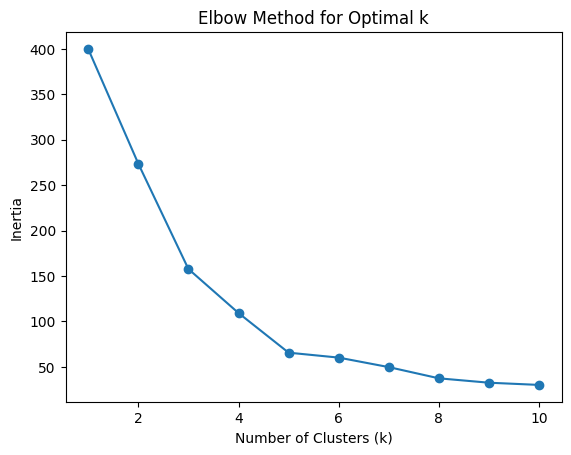

In [5]:
# prompt: Pull data from kaggle fit for clustering and perform a k-means clustering on top of the data. Plot the elbow method and identify the best number of clusters to group data into using it. Using the same value of k perform k means clustering with random init as 'random'. Also plot the clustering results as 3 D graph

!pip install kaggle
!pip install opendatasets
!pip install plotly

import opendatasets as od
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import plotly.express as px


# Download the dataset (replace with your dataset URL)
od.download("https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python")

# Load the data
data = pd.read_csv("/content/customer-segmentation-tutorial-in-python/Mall_Customers.csv")

# Select features for clustering
X = data[['Annual Income (k$)','Spending Score (1-100)']]

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)


# Elbow method to find optimal k
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


# K-means clustering with optimal k (e.g., k=5 based on elbow method)
k = 5 # Replace with the optimal k based on the elbow method plot.
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
kmeans.fit(scaled_data)
labels_kmeans = kmeans.labels_

# K-Means clustering with random initialization
kmeans_random = KMeans(n_clusters=k, init='random', random_state=42, n_init=10)
kmeans_random.fit(scaled_data)
labels_random = kmeans_random.labels_

# Add cluster labels to the data for plotting
data['Cluster (k-means++)'] = labels_kmeans
data['Cluster (Random)'] = labels_random

# 3D Plotly Visualization
fig = px.scatter_3d(data, x='Annual Income (k$)', y='Spending Score (1-100)', z='Age',
              color='Cluster (k-means++)', title='3D Cluster Visualization (k-means++)')
fig.show()


fig = px.scatter_3d(data, x='Annual Income (k$)', y='Spending Score (1-100)', z='Age',
              color='Cluster (Random)', title='3D Cluster Visualization (Random)')
fig.show()

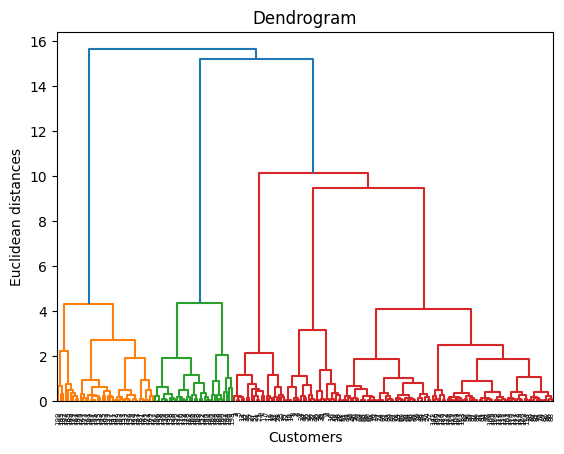

In [7]:
# prompt: Write a script to perform a hierarchical clustering on the same dataset and show the dendograms

!pip install kaggle
!pip install opendatasets
!pip install plotly

import opendatasets as od
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.cluster.hierarchy as sch


# Select features for clustering
X = data[['Annual Income (k$)','Spending Score (1-100)']]

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

# Hierarchical Clustering
dendrogram = sch.dendrogram(sch.linkage(scaled_data, method='ward')) # 'ward' method is commonly used
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

# Perform Agglomerative Clustering based on the dendrogram
n_clusters = 3  # Choose the number of clusters based on the dendrogram
hc = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
labels_hc = hc.fit_predict(scaled_data)

# Add cluster labels to the data for plotting
data['Cluster (Hierarchical)'] = labels_hc

# 3D Plotly Visualization for Hierarchical Clustering
fig = px.scatter_3d(data, x='Annual Income (k$)', y='Spending Score (1-100)', z='Age',
              color='Cluster (Hierarchical)', title='3D Cluster Visualization (Hierarchical)')
fig.show()